<a href="https://colab.research.google.com/github/dyna-bytes/PyTorchIntensive/blob/main/2_2_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var,_str='') :
    if _str=='\n' or _str=='cr' :
        _str = '\n'
    else :
        print(f'<<{_str}>>:')
        _str = ''
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}'+_str)

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [ ]:
%%capture
!pip install pytorch_lightning torchinfo torchmetrics torchviz

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

import pytorch_lightning as pl
from pytorch_lightning.accelerators import accelerator
from torchmetrics import functional as FM
from torchinfo import summary


from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.__version__,pl.__version__

('2.0.1+cu118', '2.0.3')

# Image Datasets

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10, CIFAR100
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
])

epochs=3
batch_size=1024

download_root = './MNIST'
train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
trainDataLoader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valDataLoader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

download_root = './F-MNIST'
fashion_train = FashionMNIST(download_root, transform=mnist_transform, train=True, download=True)
fashion_test = FashionMNIST(download_root, transform=mnist_transform, train=False, download=True)
fTrainDataLoader = DataLoader(fashion_train, batch_size=batch_size, shuffle=True)
fValDataLoader = DataLoader(fashion_test, batch_size=batch_size, shuffle=False)

download_root = './CIFAR10'
cifar10_train = CIFAR10(download_root, transform=mnist_transform, train=True, download=True)
cifar10_test = CIFAR10(download_root, transform=mnist_transform, train=True, download=True)
c10TrainDataLoader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
c10ValDataLoader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

download_root = './CIFAR100'
cifar100_train = CIFAR100(download_root, transform=mnist_transform, train=True, download=True)
cifar100_test = CIFAR100(download_root, transform=mnist_transform, train=True, download=True)
c100TrainDataLoader = DataLoader(cifar100_train, batch_size=batch_size, shuffle=True)
c100ValDataLoader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 195651326.57it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40084610.80it/s]


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68061088.61it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17672104.61it/s]


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 26421880/26421880 [00:00<00:00, 113799063.26it/s]


Extracting ./F-MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./F-MNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5415349.19it/s]

Extracting ./F-MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./F-MNIST/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 60370537.08it/s]


Extracting ./F-MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./F-MNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7319415.93it/s]

Extracting ./F-MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./F-MNIST/FashionMNIST/raw



100%|██████████| 170498071/170498071 [00:11<00:00, 14261219.58it/s]


Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


100%|██████████| 169001437/169001437 [00:06<00:00, 27946140.55it/s]


Extracting ./CIFAR100/cifar-100-python.tar.gz to ./CIFAR100
Files already downloaded and verified


In [ ]:
## target lable의 image 확인하기
def img_plot(data, lable, target):
    plt.figure(figsize=(12, 3))
    idx = 0
    data_ = data.permute(0, 2, 3, 1)
    for i in range(36):
        while lable[idx] != target :
            idx += 1
            if idx >=1024 : idx=0
        plt.subplot(3, 12, i+1)
        if data_.shape[-1] == 1:
            data_ = data_[..., 0]
        plt.imshow(data_[idx])
        plt.axis("off")
        idx += 1
    plt.show()

- 동일 class 이미지들의 다양성 확인하기

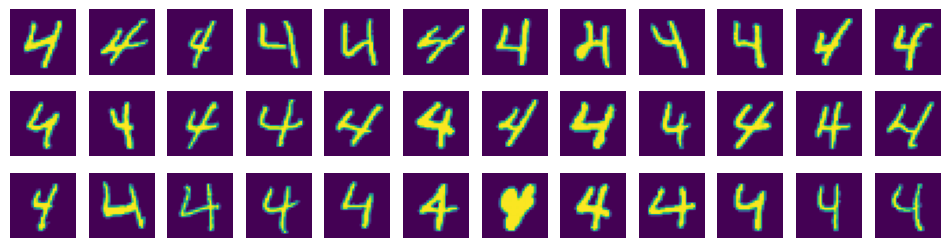

[] Shapetorch.Size([1024, 1, 28, 28]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(trainDataLoader))
img_plot(x_train, y_train, 4 )
pst(x_train)

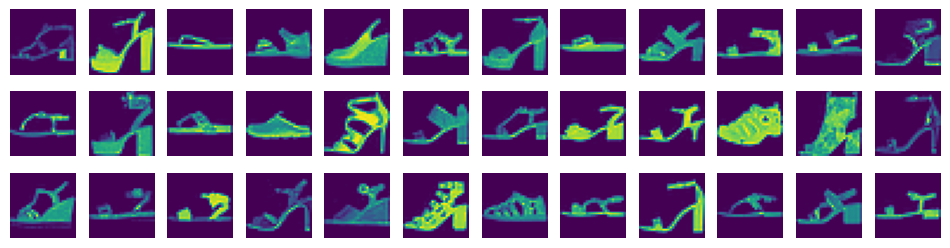

[] Shapetorch.Size([1024, 1, 28, 28]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(fTrainDataLoader))
img_plot(x_train, y_train, 5)
pst(x_train)

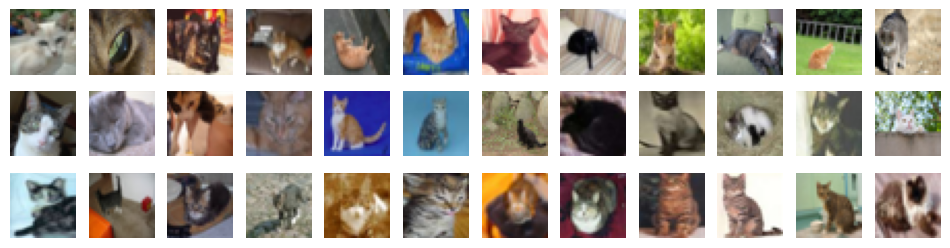

[] Shapetorch.Size([1024, 3, 32, 32]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(c10TrainDataLoader))
img_plot(x_train, y_train, 3)
pst(x_train)

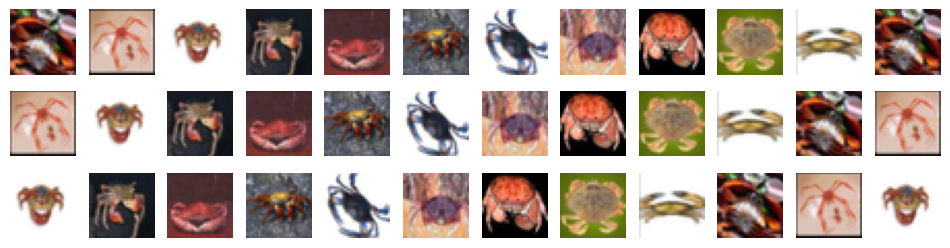

[] Shapetorch.Size([1024, 3, 32, 32]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(c100TrainDataLoader))
img_plot(x_train, y_train, 26)
pst(x_train)

In [ ]:
(y_train[:]==25).sum()

tensor(4)